<a href="https://colab.research.google.com/github/WilliamBeebee/Projects/blob/main/API_MAMAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import pandas as pd
import pandas_datareader as pdr
import datetime
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

import yfinance as yahoo

In [ ]:
FB = yahoo.Ticker("META")
Apple = yahoo.Ticker("AAPL")
Microsoft = yahoo.Ticker("MSFT")
Amazon = yahoo.Ticker("AMZN")
Tesla = yahoo.Ticker("TSLA")

In [ ]:
print("Company Sector : ", Tesla.info['sector'])

# display Price Earnings Ratio
print("Price Earnings Ratio : ", Tesla.info['trailingPE'])

# display Company Beta
print(" Company Beta : ", Tesla.info['beta'])

Company Sector :  Consumer Cyclical
Price Earnings Ratio :  74.014206
 Company Beta :  2.247148


In [ ]:
ticker_symbol = "TSLA"
start_date = "2009-01-01"
end_date = "2023-10-08"

tesla_data = yahoo.download(ticker_symbol, start=start_date, end=end_date)
tesla_data.head()
tesla_data.describe()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3.342000e+03
mean,67.613524,69.121142,65.994629,67.600213,67.600213,9.641422e+07
std,100.007957,102.269986,97.523986,99.937405,99.937405,8.063969e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,10.137333,10.374167,9.835000,10.075334,10.075334,4.538168e+07
50%,16.759667,16.997001,16.523334,16.764000,16.764000,8.006065e+07
75%,64.355002,66.216335,62.256332,64.038164,64.038164,1.230802e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


<function matplotlib.pyplot.show(close=None, block=None)>

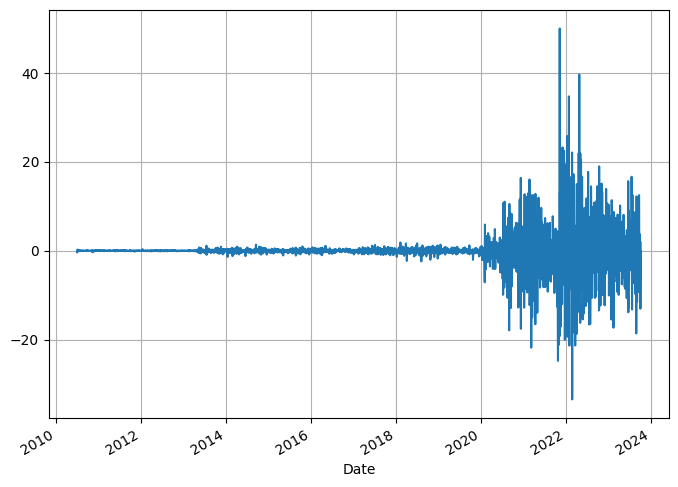

In [ ]:
tesla_data['diff'] = tesla_data.Open - tesla_data.Close
tesla_data['diff2']= tesla_data.High - tesla_data.Low

tesla_data['diff'].plot(grid=True)
plt.show


In [ ]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

now = datetime.datetime.now()
past = datetime.datetime.now() - datetime.timedelta(days=year*365)

In [ ]:
# List of tickers
tickers = ['AAPL', 'MSFT', 'META', 'TSLA']

all_data = {}

# Fetch data for each ticker and store it in the dictionary
for ticker in tickers:
    try:
        data = yahoo.download(ticker, start=start_date, end=end_date)
        all_data[ticker] = data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Access data for a specific ticker, e.g., TSLA
tsla_data = all_data['TSLA']

# Print the last few rows of TSLA data
print(tsla_data.tail())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-10-02  244.809998  254.279999  242.619995  251.600006  251.600006   
2023-10-03  248.610001  250.020004  244.449997  246.529999  246.529999   
2023-10-04  248.139999  261.859985  247.600006  261.160004  261.160004   
2023-10-05  260.000000  263.600006  256.250000  260.049988  260.049988   
2023-10-06  253.979996  261.649994  250.649994  260.529999  260.529999   

               Volume  
Date                   
2023-10-02  123810400  
2023-10-03  101985300  
2023-10-04  129721600  
2023-10-05  119159200  
2023-10-06  117947000  


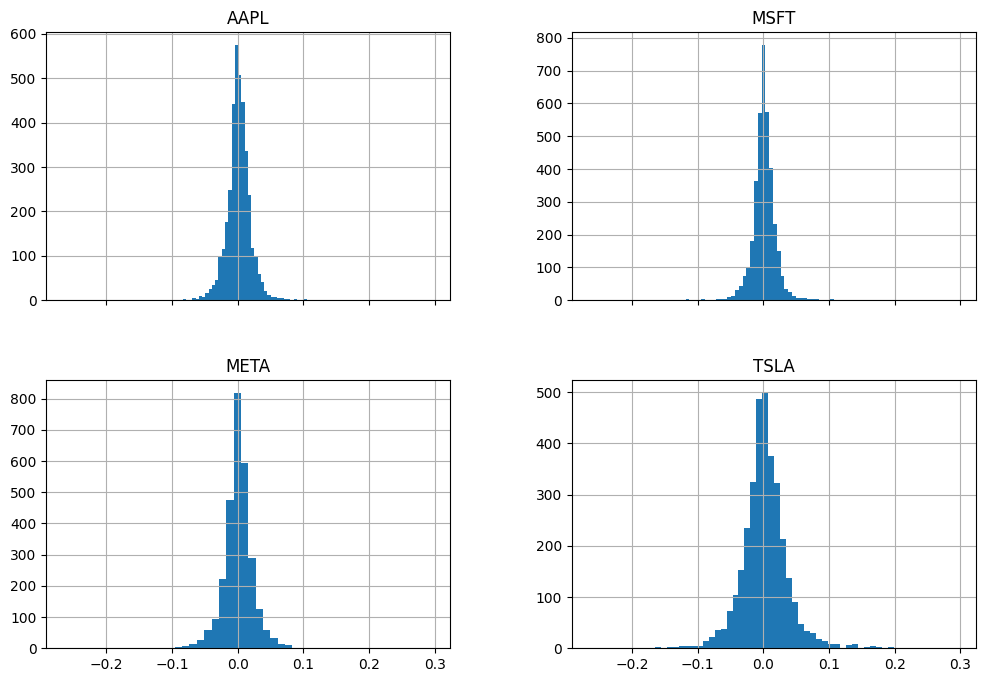

In [ ]:
if all_data:
    # Combine the Adjusted Close prices into a single DataFrame
    close_prices = pd.concat([data['Adj Close'] for data in all_data.values()], axis=1, keys=all_data.keys())

    # Calculate the daily percentage change
    daily_pct_change = close_prices.pct_change()

    # Plot the distributions
    daily_pct_change.hist(bins=50, sharex=True, figsize=(12, 8))

    # Show the resulting plot
    plt.show()
else:
    print("No data available for the selected tickers.")

<Axes: xlabel='Date'>

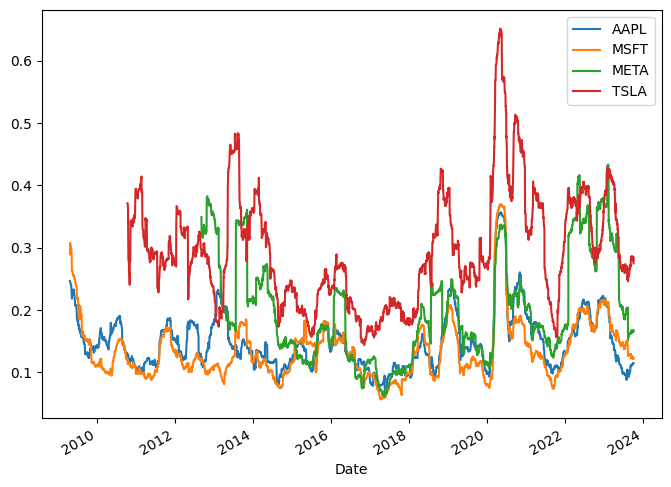

In [ ]:
min_periods = 75

volatility = daily_pct_change.rolling(min_periods).std()*np.sqrt(min_periods)
volatility.plot(figsize=(8,6))


In [ ]:
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=tesla_data.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = tesla_data['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = tesla_data['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

            signal  short_mavg   long_mavg  positions
Date                                                 
2010-06-29     0.0    1.592667    1.592667        NaN
2010-06-30     0.0    1.590667    1.590667        0.0
2010-07-01     0.0    1.548445    1.548445        0.0
2010-07-02     0.0    1.481333    1.481333        0.0
2010-07-06     0.0    1.399867    1.399867        0.0
...            ...         ...         ...        ...
2023-10-02     1.0  248.406499  243.152600        0.0
2023-10-03     1.0  248.283500  243.932500        0.0
2023-10-04     1.0  248.570000  244.823300        0.0
2023-10-05     1.0  249.016499  245.744000        0.0
2023-10-06     1.0  249.396249  246.685800        0.0

[3342 rows x 4 columns]


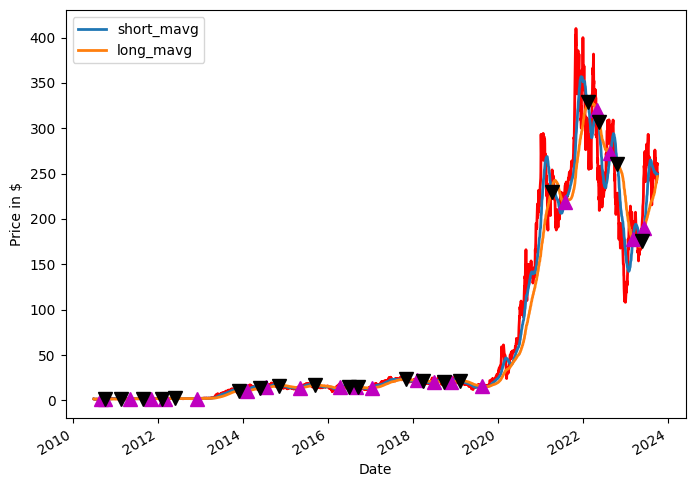

In [ ]:
# Import `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
tesla_data['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index,
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index,
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()